(array([3., 5., 4., 1., 3., 2., 1., 0., 0., 1.]),
 array([11000., 12700., 14400., 16100., 17800., 19500., 21200., 22900.,
        24600., 26300., 28000.]),
 <a list of 10 Patch objects>)

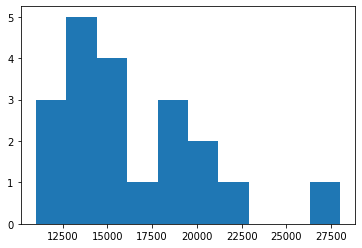

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 교보문고의 베스트셀러 웹페이지를 가져옵니다.

html = urlopen('http://www.kyobobook.co.kr/bestSellerNew/bestseller.laf')
bsObject = BeautifulSoup(html, "html.parser")


# 책의 상세 웹페이지 주소를 추출하여 리스트에 저장합니다.
book_page_urls = []
for cover in bsObject.find_all('div', {'class':'detail'}):
    link = cover.select('a')[0].get('href')
    book_page_urls.append(link)
df = pd.DataFrame(columns=["title", "author", "originalPrice","salePrice"])
# 메타 정보로부터 필요한 정보를 추출합니다.메타 정보에 없는 저자 정보만 따로 가져왔습니다.   
for index, book_page_url in enumerate(book_page_urls):
    html = urlopen(book_page_url)
    bsObject = BeautifulSoup(html, "html.parser")
    title = bsObject.find('meta', {'property':'rb:itemName'}).get('content')
    author = bsObject.select('span.name a')[0].text
    originalPrice = bsObject.find('meta', {'property': 'rb:originalPrice'}).get('content')
    salePrice = bsObject.find('meta', {'property':'rb:salePrice'}).get('content')
    df = df.append(pd.DataFrame({"title":[title], "author":[author], "originalPrice":[originalPrice],"salePrice":[salePrice]}), ignore_index=True)
tips=df.groupby('originalPrice')['salePrice'].describe()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(df['originalPrice'].apply(pd.to_numeric),bins=10)
